<a href="https://colab.research.google.com/github/Gabxist/I.C./blob/main/An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicializadores

In [ ]:
from pandas import read_csv, to_datetime, DataFrame, date_range
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import ccf

In [ ]:
# Importar repósitorio de GitHub
!rm -r I.C.
!git clone https://github.com/Gabxist/I.C..git

rm: cannot remove 'I.C.': No such file or directory
Cloning into 'I.C.'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 94 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 20.73 MiB | 5.63 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
gps = read_csv('/content/I.C./Gps_NAUS.txt',names=['DATE','TIME','DECIMAL DATE','MJD','U'], sep=r'\s+')

In [ ]:
rio_amz = read_csv('/content/I.C./dados_rio_amazonas.CSV',names=['DATE','TIME','DECIMAL DATE','CHUVA','U'],sep = ';')

In [ ]:
hydl = read_csv ('/content/I.C./HYDL_NAUS.txt',names=['DATE','TIME','DECIMAL DATE','MJD','U'], sep=r'\s+')

In [ ]:
# Não foi analisado ainda por falta de dados
# grace = read_csv ('/content/I.C./GRACE_NAUS.txt',names=['DATE','TIME','DECIMAL DATE','MJD','U'], sep=r'\s+')

# GPS


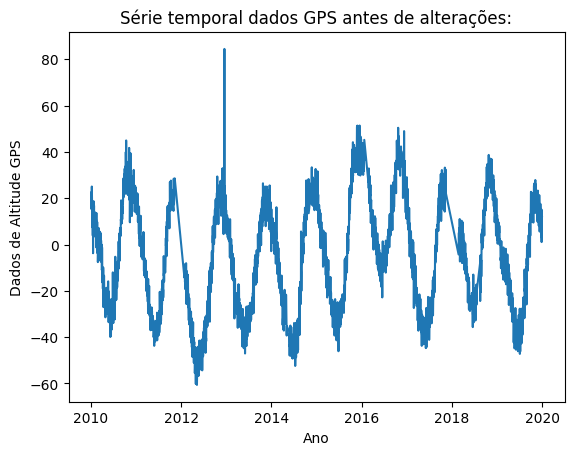

In [ ]:
#Deixando apenas os ultimos 10 anos:
remover = gps[(gps['DECIMAL DATE']<2010)|(gps['DECIMAL DATE']>2020)]
gps = gps.drop(remover.index)
#retirando linhas vazias do dataframe:
gps = gps.dropna(subset = 'U')
#plotando serie temporal
plt.plot(gps['DECIMAL DATE'], gps['U'])
plt.xlabel('Ano')
plt.ylabel('Dados de Altitude GPS')
plt.title('Série temporal dados GPS antes de alterações:')
plt.show()

In [ ]:
#outliers por IQR (análise inter quartil com coeficiente 1,5):
q1 = gps["U"].quantile(0.25)
q3 = gps['U'].quantile(0.75)
iqr = q3 - q1
tol_min = q1 - 1.5 * iqr
tol_max = q3 + 1.5 * iqr
outliers = gps[(gps['U']<tol_min)|(gps['U']> tol_max)]
print(outliers)

            DATE      TIME  DECIMAL DATE      MJD          U
2343  15/12/2012  12:00:00   2012.954918  56276.5  78.136257
2344  16/12/2012  12:00:00   2012.957650  56277.5  84.477328


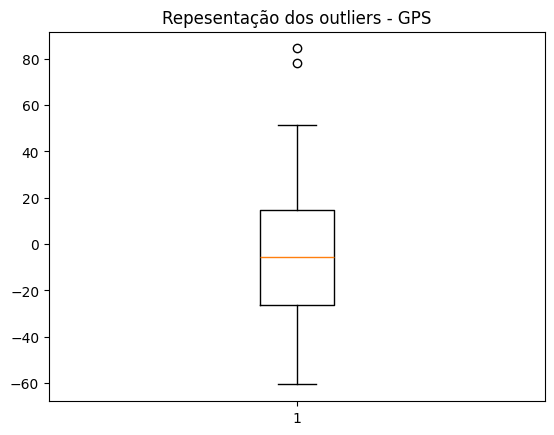

In [ ]:
# representação dos Outliers por Boxplot
plt.boxplot(gps['U'])
plt.title('Repesentação dos outliers - GPS')
plt.show()

In [ ]:
# criando novo dataframe com os dados GPS, sem os outliers
gps_o = gps.drop(outliers.index)

In [ ]:
#retirando a média
média = np.mean(gps['U'])
gps['U'] = gps['U'] - média
print(f'Média dos dados "U": {(np.mean(gps["U"])):.2f}')
média = np.mean(gps_o['U'])
gps_o['U'] = gps_o['U'] - média
print(f'Média dos dados "U" sem outliers: {(np.mean(gps_o["U"])):.2f}')

Média dos dados "U": 0.00
Média dos dados "U" sem outliers: 0.00


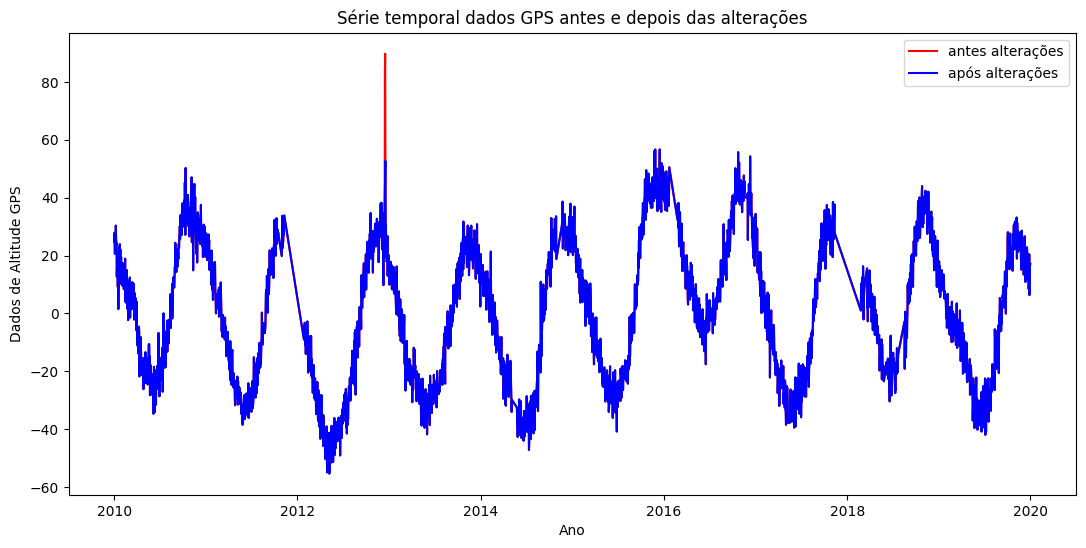

In [ ]:
fig, ax = plt.subplots(figsize = (13,6))
ax.plot(gps['DECIMAL DATE'], gps['U'], 'red',label = "antes alterações")
ax.plot(gps_o['DECIMAL DATE'], gps_o['U'], 'blue',label = "após alterações")
ax.set(xlabel ='Ano', ylabel = 'Dados de Altitude GPS', title = 'Série temporal dados GPS antes e depois das alterações')
plt.legend()
plt.show()

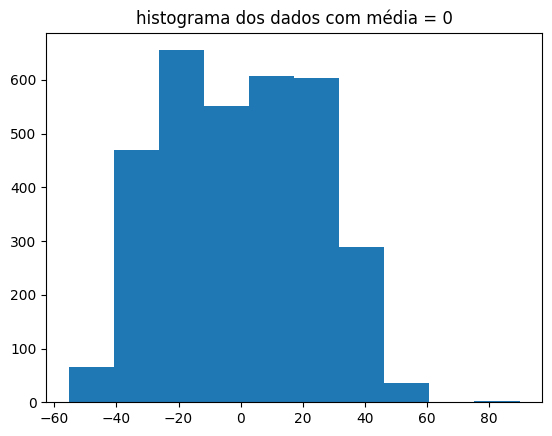

Média dos dados "U": 0.00


In [ ]:
plt.hist(gps['U'])
plt.title('histograma dos dados com média = 0')
plt.show()
print(f'Média dos dados "U": {(np.mean(gps["U"])):.2f}')

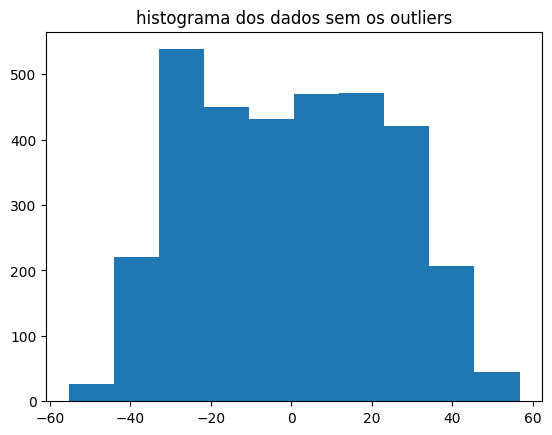

Média dos dados "U": 0.00


In [ ]:
plt.hist(gps_o['U'])
plt.title('histograma dos dados sem os outliers')
plt.show()
print(f'Média dos dados "U": {(np.mean(gps_o["U"])):.2f}')

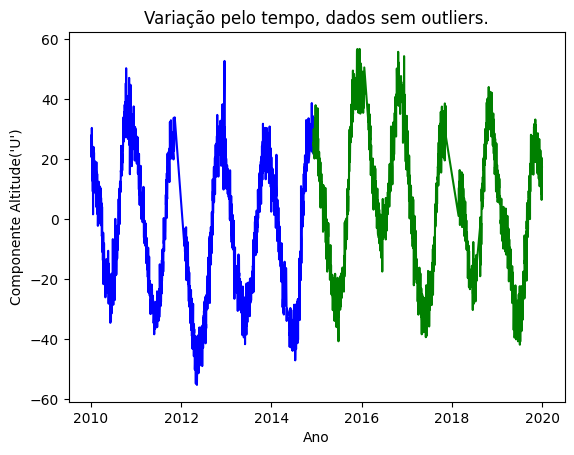

primeira metade, variância = 534.53 média = -4.73
segunda metade, variância = 549.99 média = 4.73
Falhou em rejeitar a hipótese nula de variância igual entre grupos.
P-valor: 0.59880.


In [ ]:
#plotando a serie temporal em duas metades e calculando a hipotese de variancia nula entre as metades:
metade = round(len(gps_o)/2)
div1, div2 = gps_o["U"].to_numpy()[0:metade], gps_o["U"].to_numpy()[metade:]
time1, time2 = gps_o["DECIMAL DATE"].to_numpy()[0:metade], gps_o["DECIMAL DATE"].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Altitude('U')")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var():.2f} média = {div1.mean():.2f}")
print(f"segunda metade, variância = {div2.var():.2f} média = {div2.mean():.2f}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')

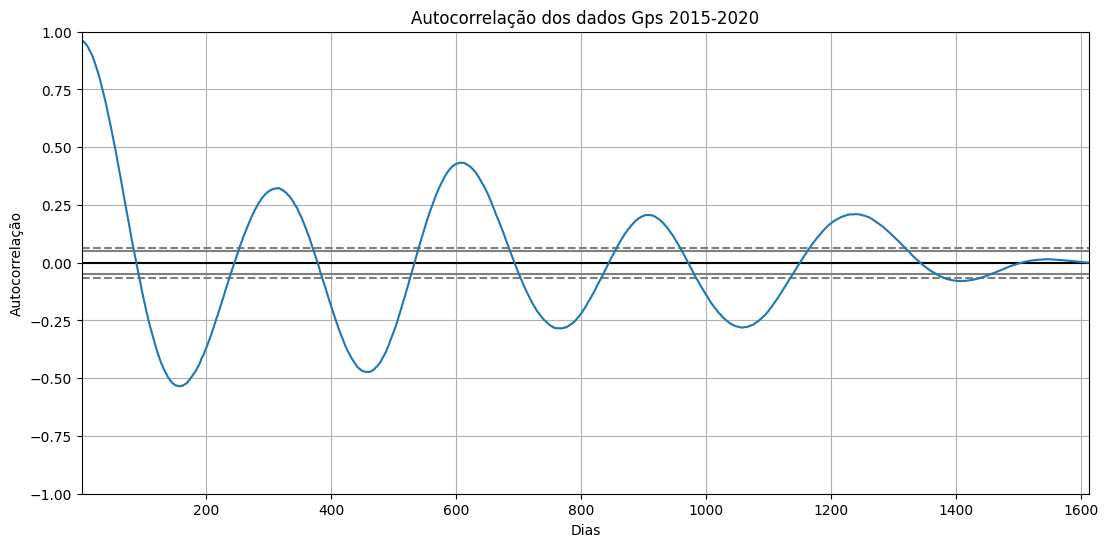

In [ ]:
# Utilizando apenas os ultimos 5 anos de dados
ult_5_anos_gps = gps_o[(gps_o["DECIMAL DATE"])>2015]
#Plotando o grafico de Autocorrelação entre os dados GPS
plt.figure(figsize = (13,6))
autocorrelation_plot(ult_5_anos_gps['U'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados Gps 2015-2020")
plt.show()

# Hydl

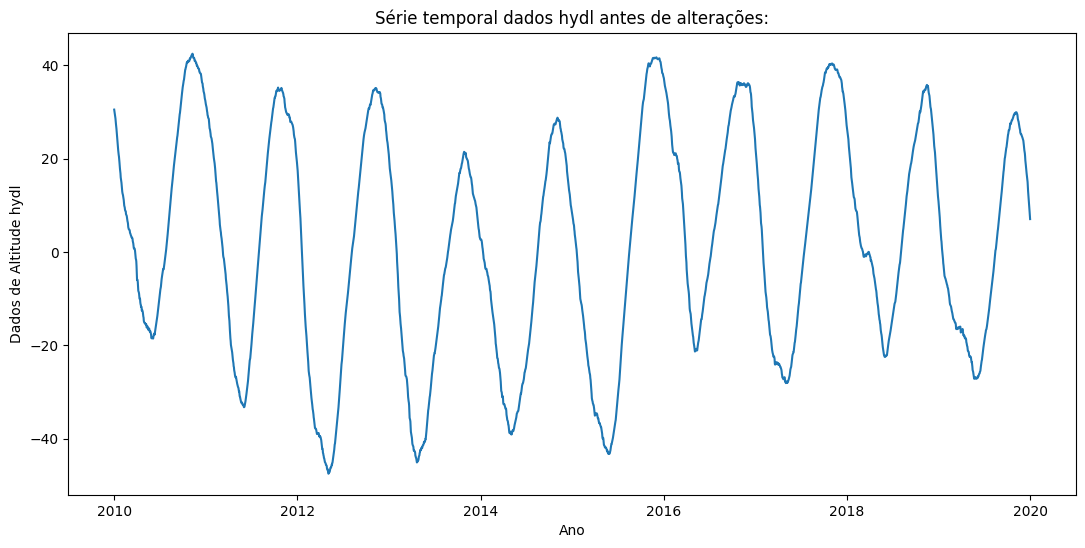

In [ ]:
#Deixando apenas os ultimos 10 anos:
remover = hydl[(hydl['DECIMAL DATE']<2010)|(hydl['DECIMAL DATE']>2020)]
hydl = hydl.drop(remover.index)
#retirando linhas vazias do dataframe:
hydl = hydl.dropna(subset = 'U')
#plotando serie temporal
plt.figure(figsize = (13,6))
plt.plot(hydl['DECIMAL DATE'], hydl['U'])
plt.xlabel('Ano')
plt.ylabel('Dados de Altitude hydl')
plt.title('Série temporal dados hydl antes de alterações:')
plt.show()

In [ ]:
#outliers por IQR (análise inter quartil com coeficiente 1,5):
q1 = hydl["U"].quantile(0.25)
q3 = hydl['U'].quantile(0.75)
iqr = q3 - q1
tol_min = q1 - 1.5 * iqr
tol_max = q3 + 1.5 * iqr
outliers = hydl[(hydl['U']<tol_min)|(hydl['U']> tol_max)]
print(outliers)

Empty DataFrame
Columns: [DATE, TIME, DECIMAL DATE, MJD, U]
Index: []


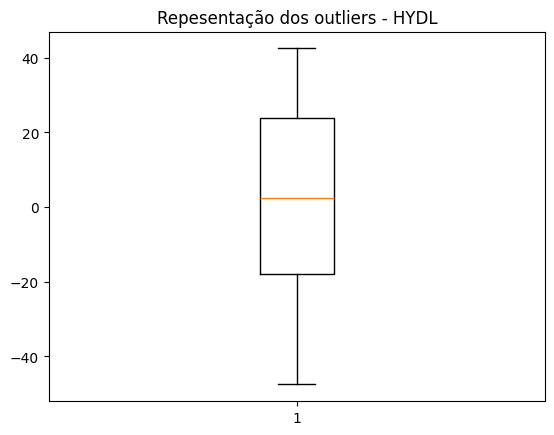

In [ ]:
# representação dos Outliers por Boxplot
plt.boxplot(hydl['U'])
plt.title('Repesentação dos outliers - HYDL')
plt.show()

In [ ]:
# observa-se que não há outliers


In [ ]:
#retirando a média
média = np.mean(hydl['U'])
hydl['U'] = hydl['U'] - média
print(f'Média dos dados "U": {(np.mean(hydl["U"])):.2f}')

Média dos dados "U": -0.00


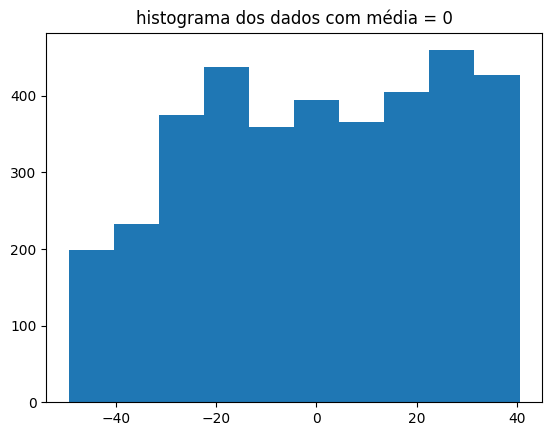

Média dos dados "U": -0.00


In [ ]:
plt.hist(hydl['U'])
plt.title('histograma dos dados com média = 0')
plt.show()
print(f'Média dos dados "U": {(np.mean(hydl["U"])):.2f}')

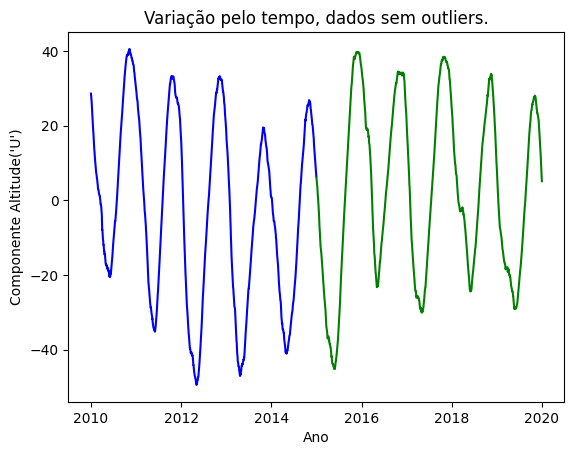

primeira metade, variância = 628.93 média = -2.54
segunda metade, variância = 549.61 média = 2.54
Rejeita a hipótese nula de variância igual entre grupos.
P-valor: 0.00218.


In [ ]:
#plotando a serie temporal em duas metades e calculando a hipotese de variancia nula entre as metades:
metade = round(len(hydl)/2)
div1, div2 = hydl["U"].to_numpy()[0:metade], hydl["U"].to_numpy()[metade:]
time1, time2 = hydl["DECIMAL DATE"].to_numpy()[0:metade], hydl["DECIMAL DATE"].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Altitude('U')")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var():.2f} média = {div1.mean():.2f}")
print(f"segunda metade, variância = {div2.var():.2f} média = {div2.mean():.2f}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')

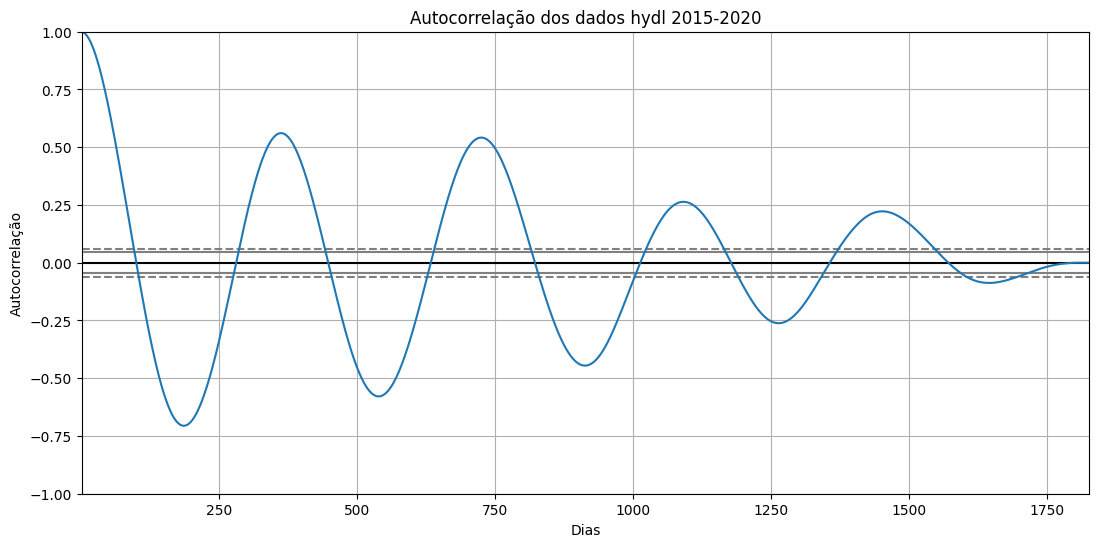

In [ ]:
# Utilizando apenas os ultimos 5 anos de dados
ult_5_anos_hydl =hydl[(hydl["DECIMAL DATE"])>2015]
#Plotando o grafico de Autocorrelação entre os dados hydl
plt.figure(figsize = (13,6))
autocorrelation_plot(ult_5_anos_hydl['U'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados hydl 2015-2020")
plt.show()

# Dados Rio Amazonas / Rio Negro


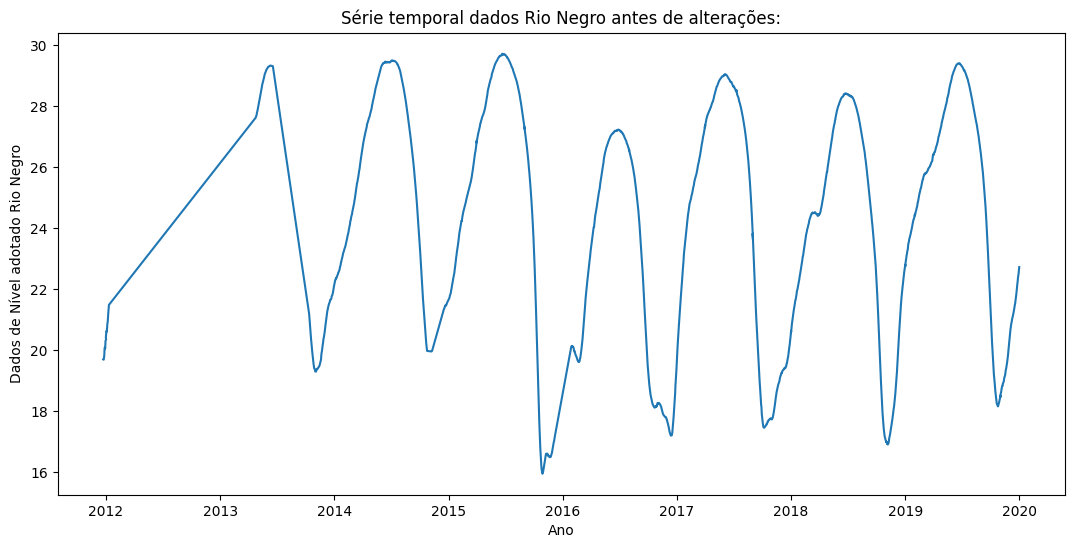

In [ ]:
#normalizando a coluna U conforme dados U GPS, pois os dados estão em cm
rio_amz["U"] = rio_amz["U"]/100
#Deixando apenas os ultimos 10 anos:
remover = rio_amz[(rio_amz['DECIMAL DATE']<2010)|(rio_amz['DECIMAL DATE']>2020)]
rio_amz = rio_amz.drop(remover.index)
# deixando somente os dados comparaveis com a série GPS "hora == 12:00:00"
remover = rio_amz[(rio_amz['TIME'] != '12:00:00')]
rio_amz = rio_amz.drop(remover.index)
#retirando as linhas vazias
rio_amz = rio_amz.dropna(subset = ['U'])
#plotando serie temporal
plt.figure(figsize = (13,6))
plt.plot(rio_amz['DECIMAL DATE'],rio_amz['U'])
plt.xlabel('Ano')
plt.ylabel('Dados de Nível adotado Rio Negro')
plt.title('Série temporal dados Rio Negro antes de alterações:')
plt.show()

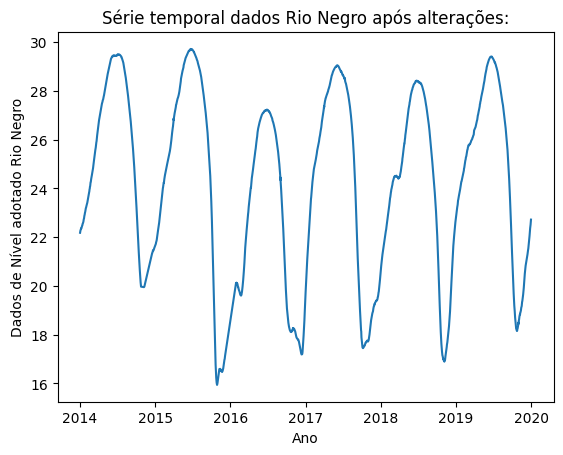

In [ ]:
#observa-se que há quebra nos dados, por isso será necessário alterar a quantidade de anos a serem analisados
#Deixando apenas os ultimos 6 anos:
remover = rio_amz[(rio_amz['DECIMAL DATE']<2014)|(rio_amz['DECIMAL DATE']>2020)]
rio_amz_o = rio_amz.drop(remover.index)
#plotando os dados da serie temporal:
plt.plot(rio_amz_o['DECIMAL DATE'],rio_amz_o['U'])
plt.xlabel('Ano')
plt.ylabel('Dados de Nível adotado Rio Negro')
plt.title('Série temporal dados Rio Negro após alterações:')
plt.show()

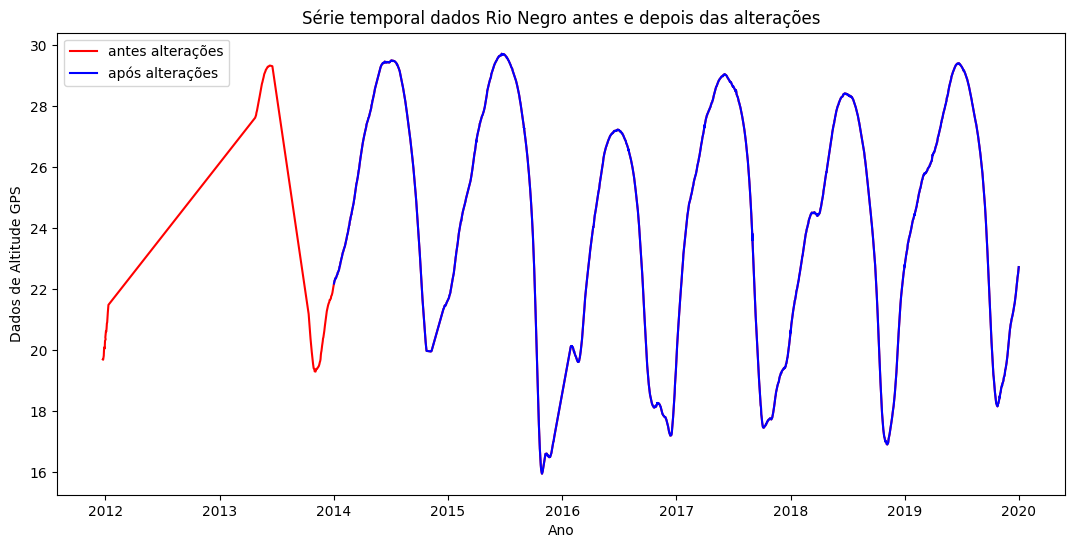

In [ ]:
fig, ax = plt.subplots(figsize = (13,6))
ax.plot(rio_amz['DECIMAL DATE'], rio_amz['U'], 'red',label = "antes alterações")
ax.plot(rio_amz_o['DECIMAL DATE'], rio_amz_o['U'], 'blue',label = "após alterações")
ax.set(xlabel ='Ano', ylabel = 'Dados de Altitude GPS', title = 'Série temporal dados Rio Negro antes e depois das alterações')
plt.legend()
plt.show()

In [ ]:
#retirando a média
média = np.mean(rio_amz_o['U'])
rio_amz_o['U'] = rio_amz_o['U'] - média
print(f'Média dos dados "U": {(np.mean(rio_amz_o["U"])):.2f}')

Média dos dados "U": 0.00


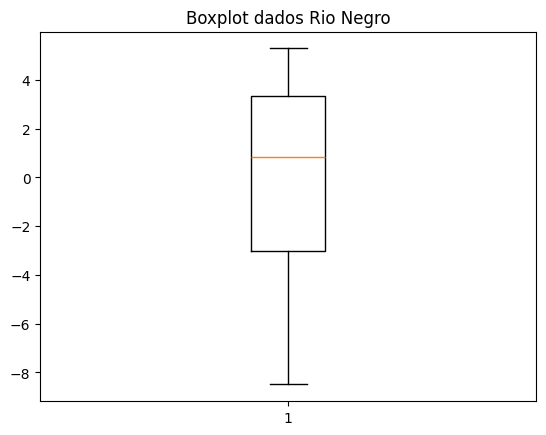

In [ ]:
#representação de outliers por Boxplot
plt.boxplot(rio_amz_o['U'])
plt.title('Boxplot dados Rio Negro')
plt.show()

In [ ]:
#observa-se que não há outliers, assim não sendo necessáirio criar um novo dataframe para retirar os outliers

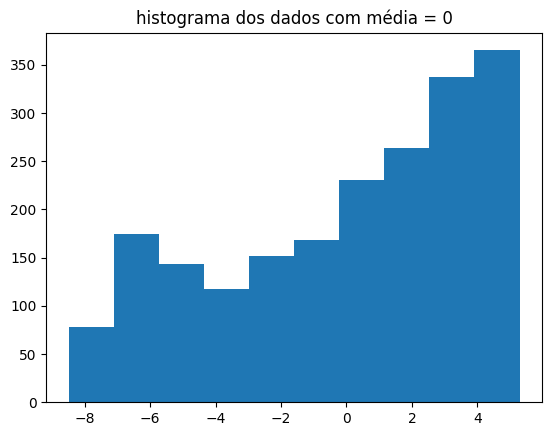

média dos dados "u": -0.00


In [ ]:
plt.hist(rio_amz_o['U'])
plt.title('histograma dos dados com média = 0')
plt.show()
print(f'média dos dados "u": {(np.mean(rio_amz_o["U"])):.2f}')

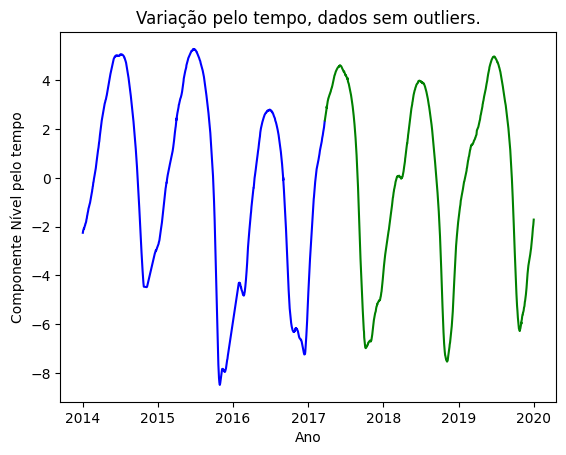

primeira metade, variância = 15.32 média = 0.06
segunda metade, variância = 14.73 média = -0.06
Falhou em rejeitar a hipótese nula de variância igual entre grupos.
P-valor: 0.63204.


In [ ]:
# Análise dos dados por Variância igual entre grupos
metade = round(len(rio_amz_o)/2)
div1, div2 = rio_amz_o['U'].to_numpy()[0:metade], rio_amz_o['U'].to_numpy()[metade:]
time1, time2 = rio_amz_o['DECIMAL DATE'].to_numpy()[0:metade], rio_amz_o['DECIMAL DATE'].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Nível pelo tempo")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var():.2f} média = {div1.mean():.2f}")
print(f"segunda metade, variância = {div2.var():.2f} média = {div2.mean():.2f}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')

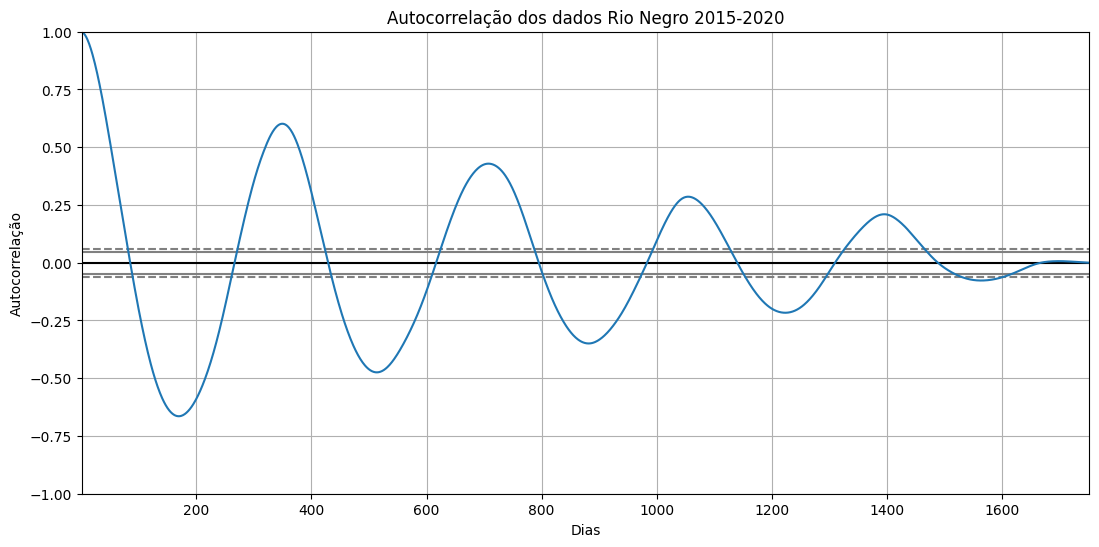

In [ ]:
# Autocorrelação entre os dados
ult_5_anos_rio = rio_amz_o[(rio_amz_o['DECIMAL DATE'])>2015]
plt.figure(figsize = (13,6))
autocorrelation_plot(ult_5_anos_rio['U'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados Rio Negro 2015-2020")
plt.show()

# Correlação Cruzada

In [ ]:
#Criando um dataframe juntando os dados dos dois dataframes com os dados dos ultimos 5 anos:
# função para facilitar o tratamento dos dados:
def mudar_dados (nome):
  '''
  Altera as duas colunas de data e hora em uma só para facilitar o tratamento dos dados.
    '''
  nome['datetime'] = nome['DATE']+" "+nome["TIME"]
  nome['datetime'] = to_datetime(nome['datetime'],format="%d/%m/%Y %H:%M:%S")
  nome.set_index(['datetime'],inplace=True)
  return nome

aux1 = ult_5_anos_gps.copy()
aux2 = ult_5_anos_hydl.copy()
aux3 = ult_5_anos_rio.copy()
aux1 = mudar_dados(aux1)
aux2 = mudar_dados(aux2)
aux3 = mudar_dados(aux3)
juntos = aux1.join(aux2[['U']], how='left', lsuffix = ' gps',rsuffix=' hydl')
juntos = juntos.join(aux3["U"], how='left')
juntos = juntos.dropna()

In [ ]:
# exportando como arquivo xlsx para análise "manual"
#não é extritamente nescessário, mas eu optei por analisar manualmente inicialmente
juntos.to_excel('/content/I.C./teste.xlsx')

In [ ]:
'''
#Utilizando a normalização por Z-score para ajustar os dados para que fique visível a representação junta
juntos['U gps'] = (juntos['U gps']-juntos['U gps'].mean() )/juntos['U gps'].std()
juntos['U hydl'] = (juntos['U hydl']-juntos['U hydl'].mean())/juntos['U hydl'].std()
juntos['U'] = (juntos['U']-juntos['U'].mean())/juntos['U'].std()
'''

"\n#Utilizando a normalização por Z-score para ajustar os dados para que fique visível a representação junta\njuntos['U gps'] = (juntos['U gps']-juntos['U gps'].mean() )/juntos['U gps'].std()\njuntos['U hydl'] = (juntos['U hydl']-juntos['U hydl'].mean())/juntos['U hydl'].std()\njuntos['U'] = (juntos['U']-juntos['U'].mean())/juntos['U'].std()\n"

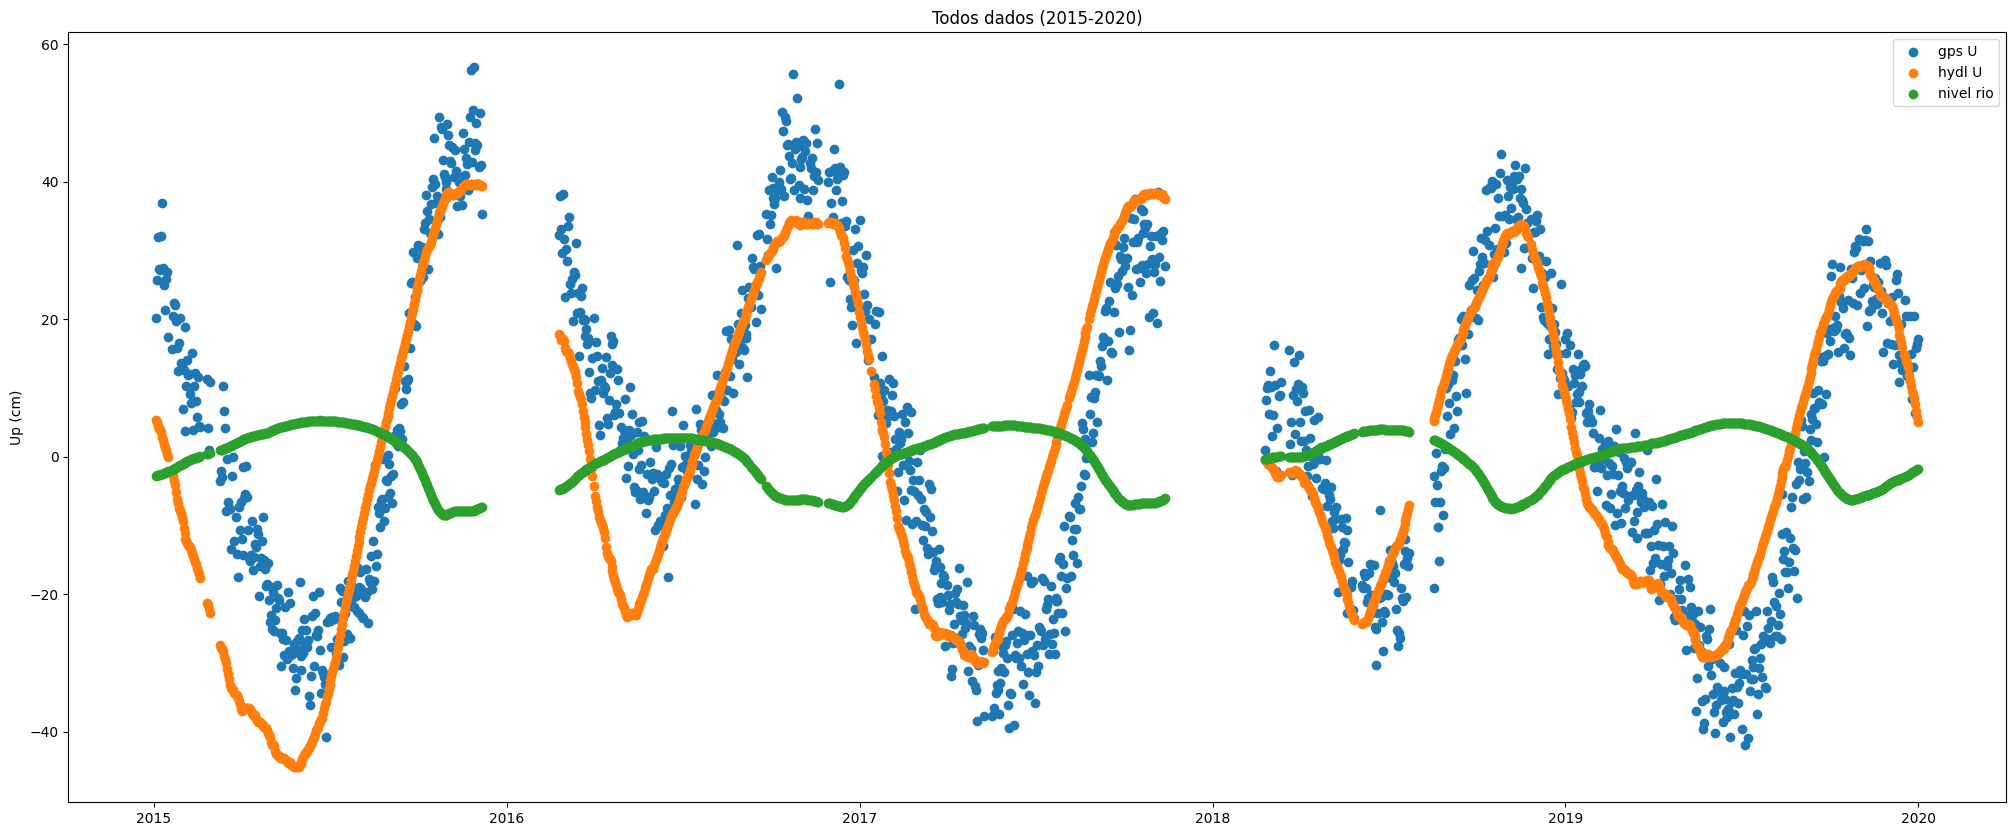

In [ ]:
#Plotando as séries em uma imagem só
plt.figure(figsize = (25,10))
plt.scatter(juntos['DECIMAL DATE'],juntos['U gps'], label= 'gps U')
plt.scatter(juntos['DECIMAL DATE'],juntos['U hydl'], label = 'hydl U')
plt.scatter(juntos['DECIMAL DATE'],juntos['U'],label =  'nivel rio' )
plt.ylabel("Up (cm)")
plt.title('Todos dados (2015-2020)')
plt.legend()
plt.show()

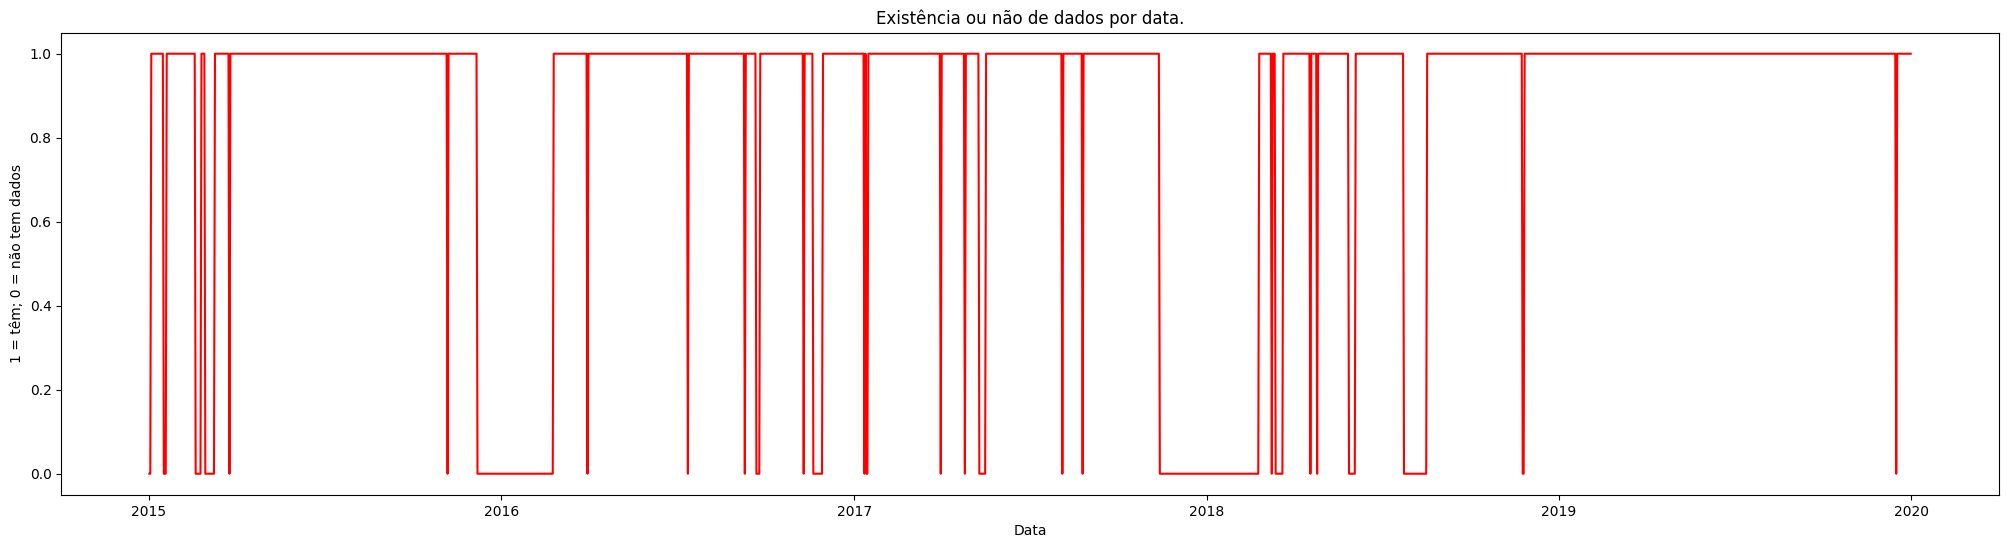

In [ ]:
# Criar o dataframe com todas as datas dentro do intervalo dos dados observados
lista_datas = date_range(start='2015-01-01 12:00', end='2019-12-31 12:00', freq='1d')
datas = DataFrame(index=lista_datas)

# Identificar datas faltantes
datas["presente"] = datas.index.isin(juntos.index)

#plotar data/Boleano:
plt.figure(figsize=(25,6))
plt.plot(datas.index, datas['presente'], color='r')
plt.title("Existência ou não de dados por data.")
plt.ylabel('1 = têm; 0 = não tem dados')
plt.xlabel('Data')
plt.show()


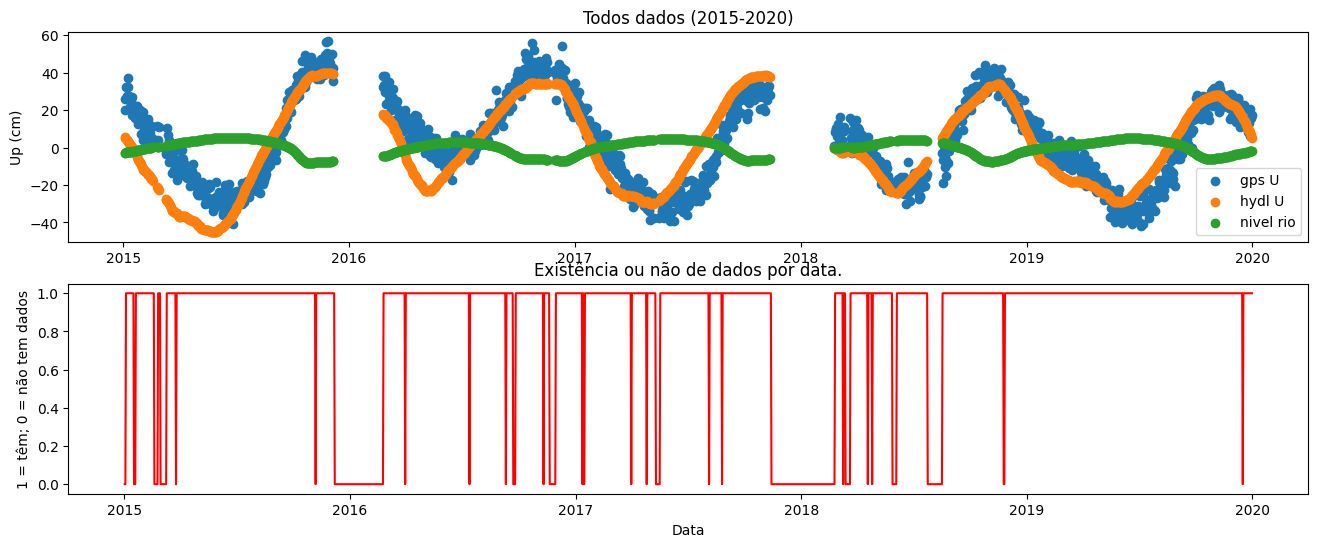

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(16,6))
ax[0].scatter(juntos['DECIMAL DATE'],juntos['U gps'], label= 'gps U')
ax[0].scatter(juntos['DECIMAL DATE'],juntos['U hydl'], label = 'hydl U')
ax[0].scatter(juntos['DECIMAL DATE'],juntos['U'],label =  'nivel rio' )
ax[0].set_ylabel("Up (cm)")
ax[0].set_title('Todos dados (2015-2020)')
ax[1].plot(df.index, df['presente'], color='r')
ax[1].set_title("Existência ou não de dados por data.")
ax[1].set_ylabel('1 = têm; 0 = não tem dados')
ax[1].set_xlabel('Data')
ax[0].legend()
plt.show()

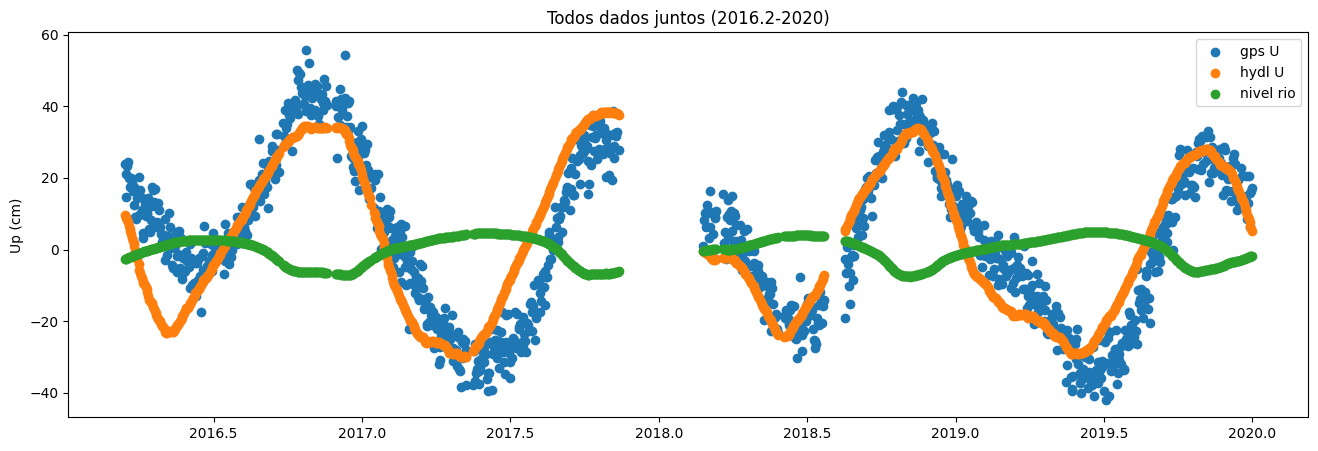

In [ ]:
#Observa-se quebra de dados
juntos = juntos[(juntos['DECIMAL DATE'])>2016.2]
#plotando os dados em conjunto
plt.figure(figsize=(16,5))
plt.scatter(juntos['DECIMAL DATE'],juntos['U gps'], label= 'gps U')
plt.scatter(juntos['DECIMAL DATE'],juntos['U hydl'], label = 'hydl U' )
plt.scatter(juntos['DECIMAL DATE'],juntos['U'],label =  'nivel rio' )
plt.title('Todos dados juntos (2016.2-2020)')
plt.ylabel('Up (cm)')
plt.legend()
plt.show()

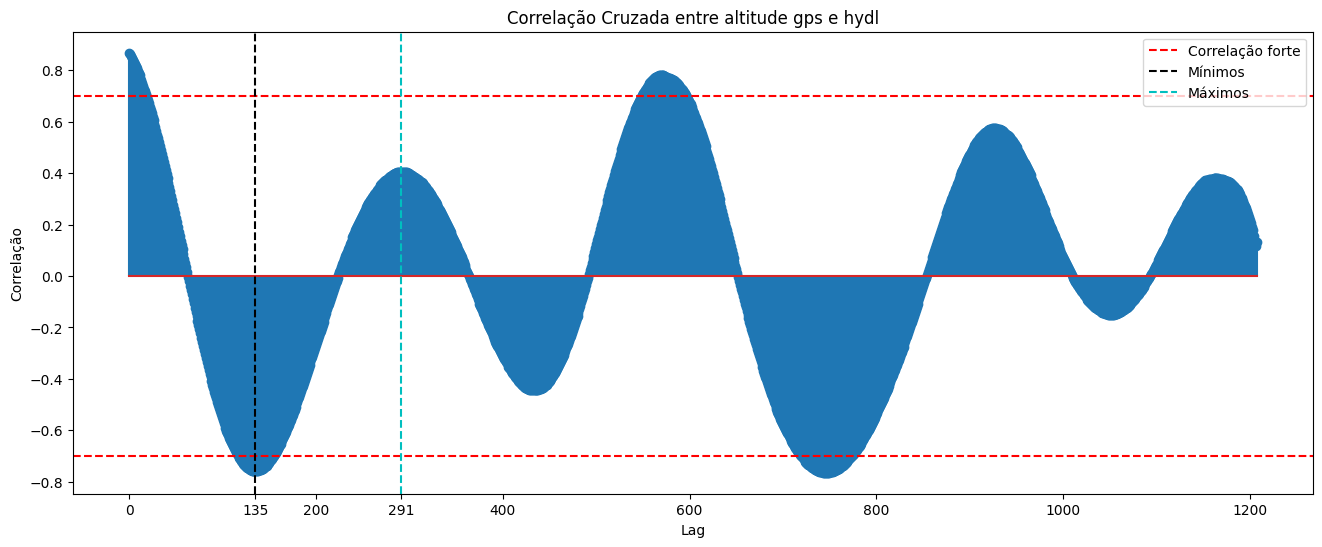

dias das correlações iniciais hydl e gps: 137.0 dias 312.0 dias


In [ ]:
#Calculando a correlação cruzada entre 'U hydl' e 'U Gps'
corr_hydlgps = ccf(juntos['U hydl'], juntos['U gps'])
#para determinar os minimos e maximos:
"""
maximo=[]
minimo=[]
numero=[]
for i in range(0,1200,100):
  numero.append(i)
  print(len(numero))
for i in range(len(numero)-1):
  intervalo = corr_hydlgps[numero[i]:numero[i+1]]
  if max(intervalo)>0.4:
    maximo.append(np.where(corr_hydlgps == max(intervalo)))
  elif min(intervalo)<-0.4:
    minimo.append(np.where(corr_hydlgps == min(intervalo)))

print(f'min{minimo}')
print(f'max{maximo}')

print(np.where(corr_hydlgps == max(corr_hydlgps[1000:1200])))
"""
# Plotando a correlação cruzada
plt.figure(figsize = (16,6))
plt.stem(range(len(corr_hydlgps)), corr_hydlgps)
plt.title('Correlação Cruzada entre altitude gps e hydl')
plt.axhline(y=0.7,color='red', linestyle='--', label = 'Correlação forte')
plt.axhline(y=-0.7,color='red', linestyle='--')
a = 135
b = 291
plt.axvline(a,color='black', linestyle='--', label = 'Mínimos')
plt.axvline(b,color='c', linestyle='--', label = 'Máximos' )
plt.xlabel('Lag')
plt.ylabel('Correlação')
x = range(0, 1201, 200)
plt.xticks(list(x) +[a,b])
plt.legend()
plt.show()
print('dias das correlações iniciais hydl e gps:',juntos.iloc[a,3]-juntos.iloc[0,3],'dias',juntos.iloc[b,3]-juntos.iloc[0,3],'dias')

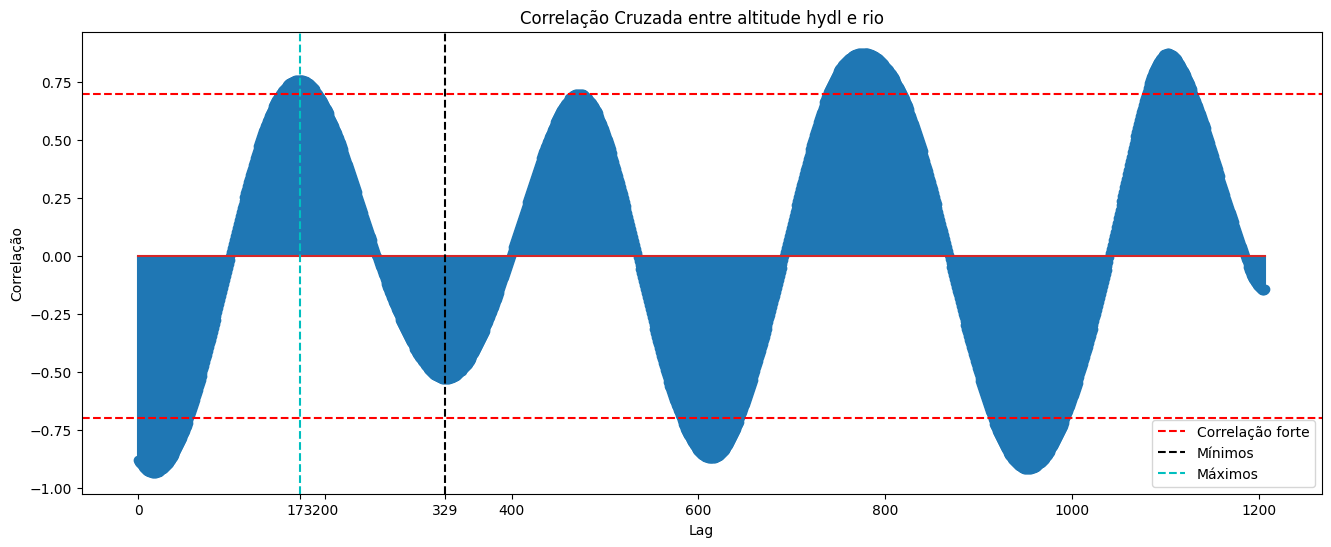

dias das correlações iniciais hydl e rio: 175.0 dias 350.0 dias


In [ ]:
#Calculando a correlação cruzada entre 'U hydl' e 'U rio'
corr_hydlrio = ccf(juntos['U'], juntos['U hydl'])

#para determinar os minimos e maximos:
"""maximo=[]
minimo=[]
numero=[]
for i in range(0,1200,100):
  numero.append(i)
  print(len(numero))
for i in range(len(numero)-1):
  intervalo = corr_hydlrio[numero[i]:numero[i+1]]
  if max(intervalo)>0.5:
    maximo.append(np.where(corr_hydlrio == max(intervalo)))
  elif min(intervalo)<-0.5:
    minimo.append(np.where(corr_hydlrio == min(intervalo)))

print(f'min{minimo}')
print(f'max{maximo}')

print(np.where(corr_hydlrio == max(corr_hydlrio[1000:1200])))
"""
# Plotando a correlação cruzada
plt.figure(figsize = (16,6))
plt.stem(range(len(corr_hydlrio)), corr_hydlrio)
plt.title('Correlação Cruzada entre altitude hydl e rio')
plt.axhline(y=0.7,color='red', linestyle='--', label = 'Correlação forte')
plt.axhline(y=-0.7,color='red', linestyle='--')
a = 329
b = 173
plt.axvline(a,color='black', linestyle='--', label = 'Mínimos')
plt.axvline(b,color='c', linestyle='--', label = 'Máximos' )
plt.xlabel('Lag')
plt.ylabel('Correlação')
x = range(0, 1201, 200)
plt.xticks(list(x) +[a,b])
plt.legend()
plt.show()
print('dias das correlações iniciais hydl e rio:',juntos.iloc[b,3]-juntos.iloc[0,3],'dias',juntos.iloc[a,3]-juntos.iloc[0,3],'dias')

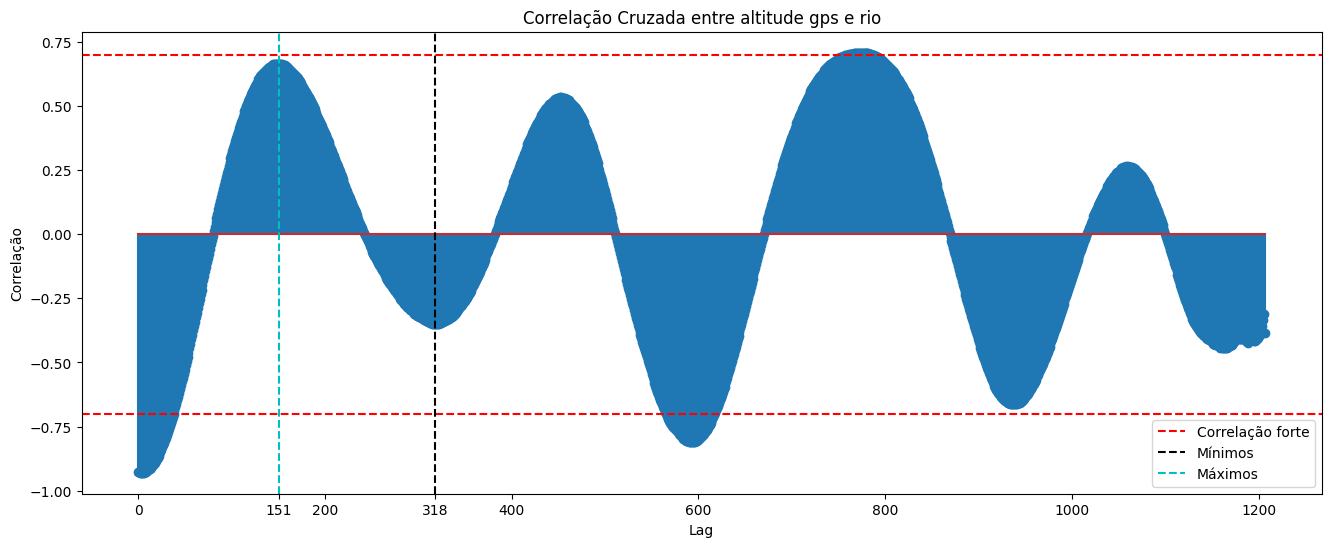

dias das correlações iniciais gps e rio: 153.0 dias 339.0 dias


In [ ]:
#Calculando a correlação cruzada entre 'U gps' e 'U rio'
corr_gpsrio = ccf(juntos['U'], juntos['U gps'])
#para determinar os minimos e maximos:
"""
maximo=[]
minimo=[]
numero=[]
for i in range(0,1200,100):
  numero.append(i)
  print(len(numero))
for i in range(len(numero)-1):
  intervalo = corr_gpsrio[numero[i]:numero[i+1]]
  if max(intervalo)>0.5:
    maximo.append(np.where(corr_gpsrio == max(intervalo)))
  elif min(intervalo)<-0.25:
    minimo.append(np.where(corr_gpsrio == min(intervalo)))

print(f'min{minimo}')
print(f'max{maximo}')

print(np.where(corr_gpsrio == max(corr_gpsrio[1000:1200])))
"""
# Plotando a correlação cruzada
plt.figure(figsize = (16,6))
plt.stem(range(len(corr_gpsrio)), corr_gpsrio)
plt.axhline(y=0.7,color='red', linestyle='--', label = 'Correlação forte')
plt.axhline(y=-0.7,color='red', linestyle='--')
a = 318
b = 151
plt.axvline(a,color='black', linestyle='--', label = 'Mínimos')
plt.axvline(b,color='c', linestyle='--', label = 'Máximos' )
plt.title('Correlação Cruzada entre altitude gps e rio')
plt.xlabel('Lag')
plt.ylabel('Correlação')
x = range(0, 1201, 200)
plt.xticks(list(x) +[a,b])
plt.legend()
plt.show()
print('dias das correlações iniciais gps e rio:',juntos.iloc[b,3]-juntos.iloc[0,3],'dias',juntos.iloc[a,3]-juntos.iloc[0,3],'dias')

# TESTE / extras


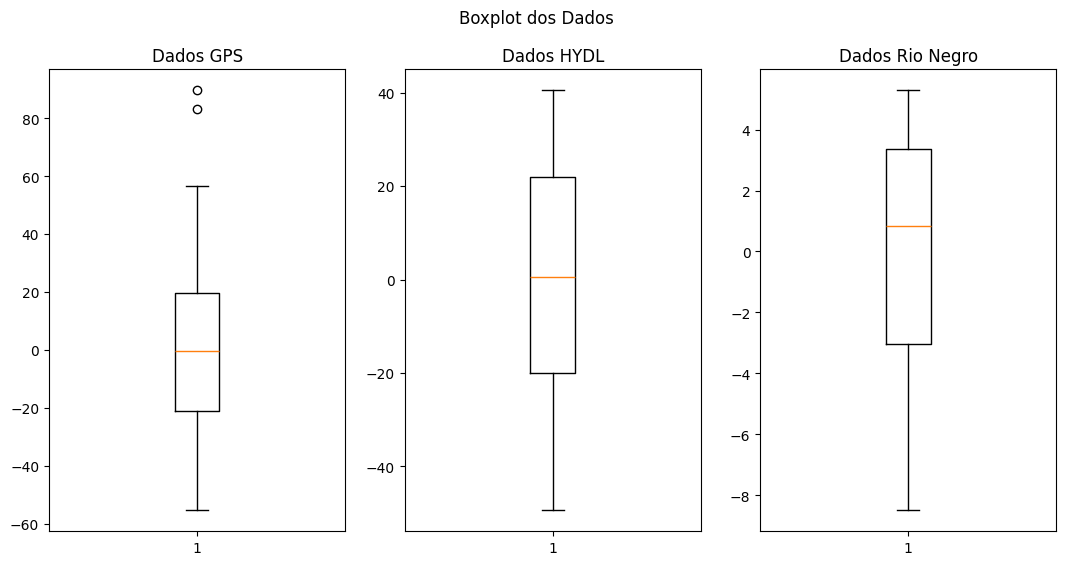

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(13,6))
ax[0].boxplot(gps['U'])
ax[0].set_title("Dados GPS")
ax[1].boxplot(hydl['U'])
ax[1].set_title("Dados HYDL")
ax[2].boxplot(rio_amz_o['U'])
ax[2].set_title("Dados Rio Negro")
fig.suptitle('Boxplot dos Dados')
plt.show()